<link rel="stylesheet" type="text/css" href="../styles/styles.css">

### 2.3 Композиция классов

<link rel="stylesheet" type="text/css" href="../styles/styles.css">

##### Композиции классов "Автор" и "Книга"

In [18]:
# Класс "Автор"
class Author:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f'Author: {self.name}'

In [19]:
# Класс "Книга"
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = Author(author)  # пример композиции классов

    def __str__(self):
        return f'Book: {self.title}, {self.author}'

In [20]:
# Пример использования композиции классов "Автор" и "Книга"
book1 = Book('The Great Gatsby', 'F. Scott Fitzgerald')
book2 = Book('To Kill a Mockingbird', 'Harper Lee')

print(book1, book2, sep='\n')

Book: The Great Gatsby, Author: F. Scott Fitzgerald
Book: To Kill a Mockingbird, Author: Harper Lee


<link rel="stylesheet" type="text/css" href="../styles/styles.css">

##### Композиции классов "Игрок" и "Команда"

In [10]:
# Класс "Игрок"
class Player:
    def __init__(self, name, age, position):
        self.name = name
        self.age = age
        self.position = position

    def __str__(self):
        return f'Игрок: {self.name}, возраст: {self.age}, позиция: {self.position}'

In [27]:
# Класс "Команда"
class Team:
    def __init__(self, title, coach=None):
        self.title = title
        self.coach = coach
        self.players = []

    def add_player(self, player):
        self.players.append(player)

    def remove_player(self, player):
        self.players.remove(player)

    def list_players(self):
        print(f'Команда "{self.title}":\n\t' + '\n\t'.join(str(player) for player in self.players))

In [28]:
# Пример использования композиции классов "Игрок" и "Команда"
if __name__ == '__main__':
    # Создаем игроков
    player1 = Player('Иванов', 25, 'Нападающий')
    player2 = Player('Петров', 30, 'Полузащитник')
    player3 = Player('Сидоров', 28, 'Защитник')

    # Создаем команды
    team1 = Team('Красные')
    team2 = Team('Синие')

    # Добавляем игроков в команды
    team1.add_player(player1)
    team1.add_player(player2)
    team2.add_player(player3)

    # Выводим список игроков в командах
    team1.list_players()
    team2.list_players()

    # Удаляем игрока из команды
    team1.remove_player(player2)

    # Выводим обновленный список игроков
    team1.list_players()

Команда "Красные":
	Игрок: Иванов, возраст: 25, позиция: Нападающий
	Игрок: Петров, возраст: 30, позиция: Полузащитник
Команда "Синие":
	Игрок: Сидоров, возраст: 28, позиция: Защитник
Команда "Красные":
	Игрок: Иванов, возраст: 25, позиция: Нападающий


<link rel="stylesheet" type="text/css" href="../styles/styles.css">

##### Композиция классов модели машииного обучения

In [18]:
# Импорт библиотеки для работы с массивами
import numpy as np

In [25]:
# Класс "Линейная регрессия"
class LinearRegression:
    # Инициализация модели
    def __init__(self, method='simple'):
        self.method = method
        self.a = None

    # Метод для обучения модели
    def fit(self, X, y):
        if self.method == 'simple':
            self.a = np.sum(y / X) / len(X)
        elif self.method == 'MNK':
            self.a = np.sum(y * X) / np.sum(X**2)
        else:
            raise ValueError("Неподдерживаемый метод:", self.method)

    # Метод для предсказания
    def predict(self, X):
        if self.a is None:
            print('Модель не обучена')
        else:
            return self.a * X

In [26]:
# Класс "Оценка модели"
class ModelEvaluation:
    # Статический метод для оценки среднеквадратичной ошибки модели
    @staticmethod
    def mean_squared_error(model, y, X):
        predictions = model.predict(X)
        return np.mean((y - predictions)**2)

In [27]:
# Пример использования композиции классов модели машииного обучения
# Генерируем случайные данные для примера
X = np.random.rand(100, 1)
a = 1  # коэффициент для создания тестовых данных
noise = np.random.rand(100, 1) - 0.5
r = 0.1  # амплитуда шума
y = np.dot(X, a) + np.dot(noise, r)

# Создаем и обучаем модель линейной регрессии
model_simple = LinearRegression('simple')
model_simple.fit(X, y)
print(model_simple.a)
model_mnk = LinearRegression('MNK')
model_mnk.fit(X, y)
print(model_mnk.a)

1.0334295170396333
1.0073689900082463


In [28]:
# Импорт библиотеки для построения графиков
import matplotlib.pyplot as plt

0.0010442382259883403
0.0008422434017391026


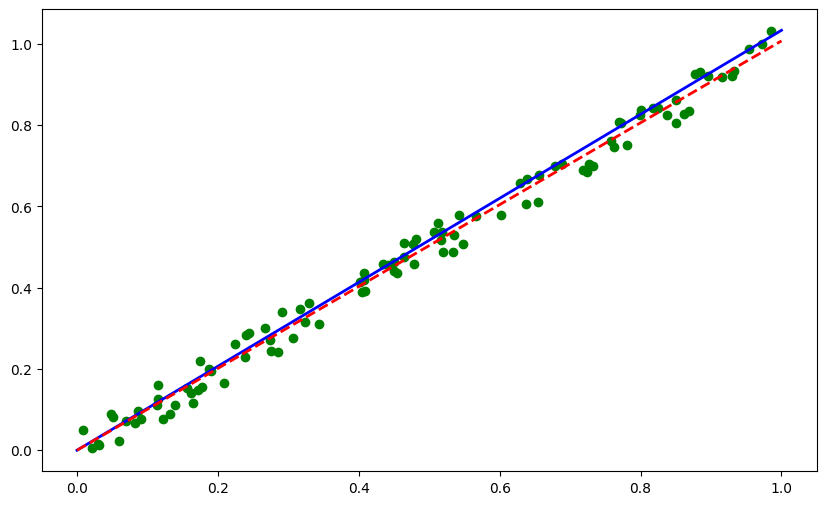

In [29]:
# График
# Создаем данные для линии 1
x1 = np.linspace(0, 1, 100)  # Генерируем 100 точек от 0 до 10
y1 = model_simple.predict(x1)

# Создаем данные для линии 2
x2 = np.linspace(0, 1, 100)
y2 = model_mnk.predict(x2)

# Создаем данные для набора точек
x_points = X
y_points = y

# Строим график
plt.figure(figsize=(10, 6))  # устанавливаем размер фигуры

# Строим линию 1 (синус)
plt.plot(x1, y1, label='simple', color='blue', linestyle='-', linewidth=2)

# Строим линию 2 (косинус)
plt.plot(x2, y2, label='mnk', color='red', linestyle='--', linewidth=2)

# Добавляем набор точек
plt.scatter(x_points, y_points, color='green', marker='o', label='Точки')

print(ModelEvaluation.mean_squared_error(model_simple, y, X))
print(ModelEvaluation.mean_squared_error(model_mnk, y, X))